In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import helper
import cmath


data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data"

csi_long = dict()
csi_long2 = dict()

csi_long["l"], csi_long["h"], all_data = helper.load_csi(f"{data_dir}/S3_wired_extclk_2_8.csv",
                                                         helper.legacy_list, helper.ht_list)

dc_phases_movement, slopes_movement = helper.compute_offsets(csi_long['h'], helper.f_sub, helper.f_c)

csi_long2["l"], csi_long2["h"], all_data2 = helper.load_csi(f"{data_dir}/S3_wired_extclk_1_8.csv",
                                                            helper.legacy_list, helper.ht_list)

dc_phases_movement2, slopes_movement2 = helper.compute_offsets(csi_long2['h'], helper.f_sub, helper.f_c)

# Plotting using subplots
fig, axs = plt.subplots(5, 1, figsize=(6, 9))
fig.tight_layout(pad=5.0)

# Plot the phases across subcarriers for first dataset
skip_rows = 5
phases = np.unwrap(np.angle(csi_long["h"]), axis=1) #* 180 / np.pi
axs[0].plot(helper.f_sub, phases[::skip_rows][:].T)
axs[0].set_title("Phases across subcarriers (Dataset 1)")
axs[0].set_xlabel("Sub-C Frequency")
axs[0].set_ylabel("Phases (deg)")

# print(len(phases[0]))

# # Plot the phases across subcarriers for second dataset
phases2 = np.unwrap(np.angle(csi_long2["h"]), axis=1) #* 180 / np.pi
# axs[0, 1].plot(helper.f_sub, phases2[::skip_rows][:].T)
# # axs[0, 1].plot(helper.f_sub, phases[::skip_rows].T - phases2[::skip_rows].T)
# axs[0, 1].set_title("Phases across subcarriers (Dataset 2)")
# axs[0, 1].set_xlabel("Sub-C Frequency")
# axs[0, 1].set_ylabel("Phases (deg)")

# Plot DC phases over packets for first dataset
# axs[1, 0].scatter(np.arange(len(dc_phases_movement)),(dc_phases_movement) * 180 / np.pi, s=5)
axs[1].plot(helper.f_sub, phases[0][:] - phases2[0][:])
axs[1].set_title("Phase Difference across subcarriers for Packet 1")
axs[1].set_xlabel("Sub-C Frequency")
axs[1].set_ylabel("Phases (deg)")

# Plot DC phases over packets for second dataset
# axs[1, 1].scatter(np.arange(len(dc_phases_movement2)),(dc_phases_movement2) * 180 / np.pi, s=5)
axs[2].plot(np.arange(len(dc_phases_movement2)),np.unwrap(dc_phases_movement-dc_phases_movement2) * 180 / np.pi)
# axs[2].plot(np.arange(len(dc_phases_movement2)),(dc_phases_movement-dc_phases_movement2) * 180 / np.pi)

# axs[1, 1].plot((dc_phases_movement2) * 180 / np.pi, ".-")
axs[2].set_title("DC phase difference")
axs[2].set_xlabel("Packets")
axs[2].set_ylabel("Phases (deg)")

axs[3].plot(helper.f_sub, phases[::skip_rows].T - phases2[::skip_rows].T)
axs[3].set_title("Phase difference across subcarriers")
axs[3].set_xlabel("Sub-C Frequency")
axs[3].set_ylabel("Phases (deg)")

axs[4].plot((np.std(phases[::].T-phases2[::].T, axis=0)), ".-")
# axs[2, 0].hist((np.std(phases[::].T-phases2[::].T, axis=0)), bins=20)
axs[4].set_title("Std. Dev. of phase difference across all Sub-C")
axs[4].set_xlabel("Packets")
axs[4].set_ylabel("Std. Dev. (deg)")

# print((np.std(phases[::skip_rows].T-phases2[::skip_rows].T, axis=0)))
print(np.std(np.unwrap(dc_phases_movement-dc_phases_movement2)*180/np.pi))

print(np.std(np.unwrap(dc_phases_movement-dc_phases_movement2)*180/np.pi))

# print((phases[0][:])- (phases2[0][:]))
# print((phases[1][:])- (phases2[1][:]))
# print((phases[3][:])- (phases2[3][:]))


plt.show()
# This code will plot all four plots in a 2x2 grid layout. Adjust the figsize parameter as needed to resize the entire figure.




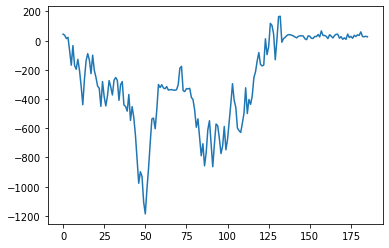

In [79]:
import cmath
plt.plot( np.unwrap(np.angle((np.exp(1j*dc_phases_movement) / np.exp( 1j*dc_phases_movement2))))*180/np.pi)

In [73]:
np.std(np.angle((np.exp(1j*phases[0][:]) / np.exp( 1j*phases2[0][:])))*180/np.pi)

3.8723744252208956

In [57]:
len(np.mean(phases-phases2, axis=1))


186

(-200.0, 200.0)

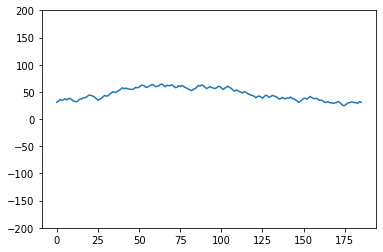

In [58]:
plt.plot(np.unwrap(np.mean(phases[:]-phases2, axis=1)))
plt.ylim((-200,200))

(-180.0, 180.0)

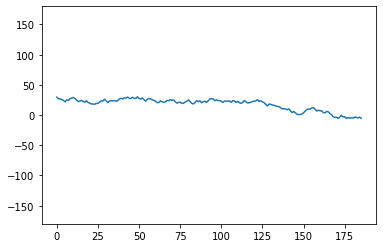

In [59]:
plt.plot(np.unwrap(np.mean(phases[:,7:59]-phases2[:,7:59], axis=1)))
plt.ylim((-180,180))

In [60]:
np.std(np.unwrap(np.mean(phases[:,7:59]-phases2[:,7:59], axis=1)))

9.90394378889308

202it [00:00, 3092.75it/s]
202it [00:00, 2930.42it/s]


Std. Dev of DC Phase 7.272860266932453
No. of packets,  202
7.272860266932467
Std. dev of mean phase across Sub-C:  4.351398675244299


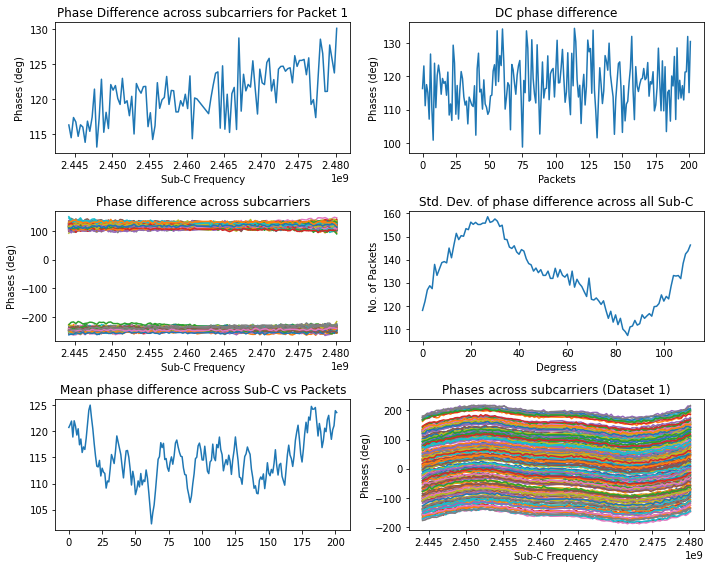

In [29]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import helper


data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

csi_long = dict()
csi_long2 = dict()

file_1 = "CSI_1.csv"
file_2 = "CSI_2.csv"

# Comment this out if packet matching is not required
# helper.match_packets(file_1, file_2, data_dir)

csi_long["l"], csi_long["h"], all_data = helper.load_csi(f"{data_dir+file_1}",
                                                         helper.legacy_list, helper.ht_list)

dc_phases_movement, slopes_movement = helper.compute_offsets(
    csi_long['h'], helper.f_sub, helper.f_c)

csi_long2["l"], csi_long2["h"], all_data2 = helper.load_csi(f"{data_dir+file_2}",
                                                            helper.legacy_list, helper.ht_list)

dc_phases_movement2, slopes_movement2 = helper.compute_offsets(
    csi_long2['h'], helper.f_sub, helper.f_c)

# Plotting using subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
fig.tight_layout(pad=5.0)

# Plot the phases across subcarriers for first dataset
skip_rows = 1
phases = np.unwrap(np.angle(csi_long["h"]), axis=1) * 180 / np.pi
axs[2, 1].plot(helper.f_sub, phases[::skip_rows][:].T)
axs[2, 1].set_title("Phases across subcarriers (Dataset 1)")
axs[2, 1].set_xlabel("Sub-C Frequency")
axs[2, 1].set_ylabel("Phases (deg)")

# print(len(phases[0]))

# # Plot the phases across subcarriers for second dataset
phases2 = np.unwrap(np.angle(csi_long2["h"]), axis=1) * 180 / np.pi
# axs[0, 1].plot(helper.f_sub, phases2[::skip_rows][:].T)
# # axs[0, 1].plot(helper.f_sub, phases[::skip_rows].T - phases2[::skip_rows].T)
# axs[0, 1].set_title("Phases across subcarriers (Dataset 2)")
# axs[0, 1].set_xlabel("Sub-C Frequency")
# axs[0, 1].set_ylabel("Phases (deg)")

# Plot DC phases over packets for first dataset
# axs[1, 0].scatter(np.arange(len(dc_phases_movement)),(dc_phases_movement) * 180 / np.pi, s=5)
axs[0, 0].plot(helper.f_sub, phases[0][:] - phases2[0][:])
# axs[1].plot(helper.f_sub, phases[0][:] - phases2[0][:])

axs[0, 0].set_title("Phase Difference across subcarriers for Packet 1")
axs[0, 0].set_xlabel("Sub-C Frequency")
axs[0, 0].set_ylabel("Phases (deg)")

# Plot DC phases over packets for second dataset
# axs[1, 1].scatter(np.arange(len(dc_phases_movement2)),(dc_phases_movement2) * 180 / np.pi, s=5)
axs[0, 1].plot(np.arange(len(dc_phases_movement2)), np.unwrap(
    dc_phases_movement-dc_phases_movement2) * 180 / np.pi)
# axs[2].plot(np.arange(len(dc_phases_movement2)),(dc_phases_movement-dc_phases_movement2) * 180 / np.pi)

# axs[1, 1].plot((dc_phases_movement2) * 180 / np.pi, ".-")
axs[0, 1].set_title("DC phase difference")
axs[0, 1].set_xlabel("Packets")
axs[0, 1].set_ylabel("Phases (deg)")

axs[1, 0].plot(helper.f_sub, phases[::skip_rows].T - phases2[::skip_rows].T)
axs[1, 0].set_title("Phase difference across subcarriers")
axs[1, 0].set_xlabel("Sub-C Frequency")
axs[1, 0].set_ylabel("Phases (deg)")

# axs[4].plot((np.std(phases[::].T-phases2[::].T, axis=0)), ".-")
stddev_all = np.std(np.unwrap(phases[::].T-phases2[::].T), axis=0)
# axs[1, 1].hist((stddev_all), bins=20)
axs[1, 1].plot(phases[0])

axs[1, 1].set_title("Std. Dev. of phase difference across all Sub-C")
axs[1, 1].set_xlabel("Degress")
axs[1, 1].set_ylabel("No. of Packets")

# print((np.std(phases[::skip_rows].T-phases2[::skip_rows].T, axis=0)))
print("Std. Dev of DC Phase", np.std(
    np.unwrap(dc_phases_movement-dc_phases_movement2)*180/np.pi))
print("No. of packets, ", (np.std(phases[::].T-phases2[::].T, axis=0)).size)
# print(np.std(np.unwrap(dc_phases_movement-dc_phases_movement2)*180/np.pi))

# print((phases[0][:])- (phases2[0][:]))
# print((phases[1][:])- (phases2[1][:]))
# print((phases[3][:])- (phases2[3][:]))
# plt.figure()
mean_all = np.unwrap(np.mean(phases[:]-phases2, axis=1))
print(np.std(np.unwrap(np.angle(
    (np.exp(1j*dc_phases_movement) / np.exp(1j*dc_phases_movement2))))*180/np.pi))
axs[2, 0].plot(mean_all)
axs[2, 0].set_title("Mean phase difference across Sub-C vs Packets")
# axs[5].set_ylim((-200,200))
# plt.xlim((0,50))
print("Std. dev of mean phase across Sub-C: ", np.std(mean_all))
plt.tight_layout()

plt.show()


# %%


In [7]:
stddev_all = np.std(np.unwrap(phases[::].T-phases2[::].T), axis=1)


In [8]:
np.argsort(stddev_all)

array([ 12,  31,   0,  97,  41,  73,  27,  11,  68,  57,  78,   1,  87,
        80,  38,  95, 102,  72,  37,   9,  64,  85,  32,  63,  79,  24,
        29,  18,  44,  76, 111, 109,  94,   7,  91,  81,  22,   5,  98,
        90, 104,  35, 100,  43,  58,  59,  53,  20,  30, 105,   3,  23,
       106,  83,  47,  77,  56,  16,  15,  33,  21,  50, 110,  67,   4,
       107,  40,  69, 108,  52,  51,  62,  36,  70,  60,  13,  39,  49,
        42,  48,  54,  88,  65,  96,  14,  84,  46,  75,  66,  71,  19,
         2,  99,  82,  25,  17,  89, 103,  55,   8,  45,  10,  86, 101,
        92,  34,  74,  26,   6,  28,  93,  61])

In [12]:
stddev_all[0]

12.752572235142727

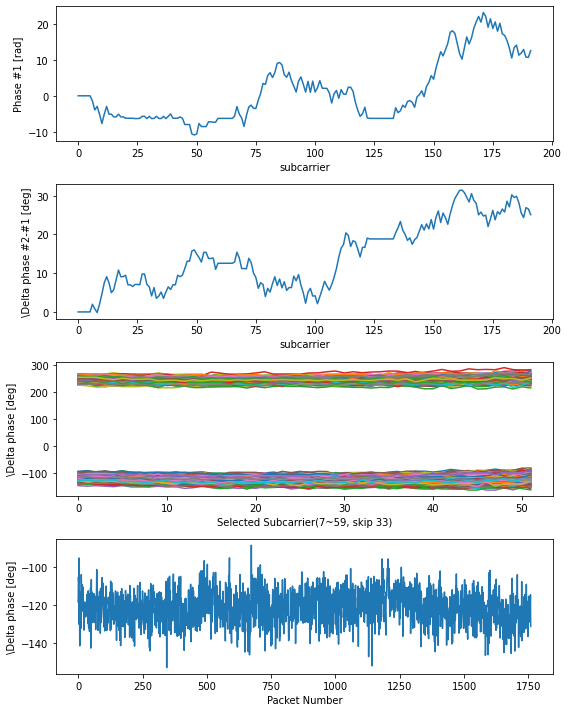

9.057633701810376


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "/Users/sureel/VS_Code/wiwi-time-sync/Data/"

data_1 = "S3_wireless_intclk_1_2"
data_2 = "S3_wireless_intclk_2_2"

# Read tables from CSV files
T1 = pd.read_csv(data_dir+data_1+".csv")
T2 = pd.read_csv(data_dir+data_2+".csv")

lengCM = T1.iloc[0, 22]  # assuming the indices in MATLAB start from 1

CMatrix1 = []
PMatrix1 = []
CMatrix2 = []
PMatrix2 = []

for index, row in T1.iterrows():
    C1 = list(map(int, row[24].strip('[]').split(',')))
    C2 = list(map(int, T2.iloc[index, 24].strip('[]').split(',')))

    c_matrix_1_row = []
    p_matrix_1_row = []
    c_matrix_2_row = []
    p_matrix_2_row = []

    for m in range(0, lengCM, 2):
        c1_complex = complex(C1[m + 1], C1[m])
        c_matrix_1_row.append(c1_complex)
        p_matrix_1_row.append(np.angle(c1_complex))

        c2_complex = complex(C2[m + 1], C2[m])
        c_matrix_2_row.append(c2_complex)
        p_matrix_2_row.append(np.angle(c2_complex))

    CMatrix1.append(c_matrix_1_row)
    PMatrix1.append(p_matrix_1_row)
    CMatrix2.append(c_matrix_2_row)
    PMatrix2.append(p_matrix_2_row)

PMatrix1 = np.array(PMatrix1)
PMatrix2 = np.array(PMatrix2)

PDiff = PMatrix2 - PMatrix1

plt.figure(figsize=(8, 10))

# Plot
plt.subplot(4, 1, 1)
plt.plot(np.unwrap(PMatrix1[0, :] * 180 / np.pi))
plt.xlabel('subcarrier')
plt.ylabel('Phase #1 [rad]')

plt.subplot(4, 1, 2)
plt.plot(np.unwrap(PDiff[0, :] * 180 / np.pi))
plt.xlabel('subcarrier')
plt.ylabel('\Delta phase #2-#1 [deg]')

# PDiffSel = np.delete(PDiff, 32, axis=1)  # delete 33rd column
PDiffSel = PDiff[:, list(range(6, 32)) + list(range(33, 59))]
# PDiffSel = PDiff
PDiffSelUW = np.unwrap(PDiffSel)
PhopAve = np.mean(PDiffSelUW, axis=1)

plt.subplot(4, 1, 3)
plt.plot((np.transpose(PDiffSelUW) * 180 / np.pi))
plt.xlabel('Selected Subcarrier(7~59, skip 33)')
plt.ylabel('\Delta phase [deg]')

plt.subplot(4, 1, 4)
plt.plot(np.unwrap(PhopAve) * 180 / np.pi)
plt.xlabel('Packet Number')
plt.ylabel('\Delta phase [deg]')

plt.tight_layout()
plt.show()

print(np.std(np.unwrap(PhopAve) * 180 / np.pi))


In [46]:
len(PDiffSelUW[0])


191

In [47]:
len

<function len(obj, /)>

In [48]:
len(PhopAve)


202

In [2]:
!pip install - r / path/to/esp-idf/requirements.txt


ERROR: Invalid requirement: '-'


In [ ]:
export IDF_PATH=~/esp/esp-idf
export PATH=$PATH:$IDF_PATH/tools
export PATH=$PATH:/Users/sureel/esp/esp-idf